In [1]:
%run src/columns.py

In [2]:
from src.data_cleaning import *

In [3]:
csv_file_names = ('LoanStats3a_securev1.csv', 'LoanStats3b_securev1.csv', 'LoanStats3c_securev1.csv', 'LoanStats3d_securev1.csv',
                  'LoanStats_securev1_2016Q1.csv', 'LoanStats_securev1_2016Q2.csv', 'LoanStats_securev1_2016Q3.csv','LoanStats_securev1_2016Q4.csv', 
                  'LoanStats_securev1_2017Q1.csv', 'LoanStats_securev1_2017Q2.csv', 'LoanStats_securev1_2017Q3.csv', 'LoanStats_securev1_2017Q4.csv',
                  'LoanStats_securev1_2018Q1.csv', 'LoanStats_securev1_2018Q2.csv', 'LoanStats_securev1_2018Q3.csv', 'LoanStats_securev1_2018Q4.csv',
                  'LoanStats_securev1_2019Q1.csv', 'LoanStats_securev1_2019Q2.csv', 'LoanStats_securev1_2019Q3.csv', 'LoanStats_securev1_2019Q4.csv',
                  'LoanStats_securev1_2020Q1.csv')

df_raw = load_loan_data_from_local_machine(csv_file_names, columns_to_use)

In [6]:
def clean_and_prepare_raw_data_for_EDA(df):
    '''
    Take in the raw dataframe containing all loan data and run through all functions required to prepare it for model training.

    Args:
        df (dataframe): Dataframe of loans.

    Returns:
        Dataframe: Returns the loan dataframe after all the data cleaning and feature engineering functions have been applied.

    TODO:
        This function currently relies on functions stored in feature-engineering.py. This is acceptable for working in the
        Jupyter notebook I have but I need to change the organization of my code later on.
    '''
    df = drop_loan_status(df)
    df = drop_joint_applicant_loans(df)
    df = fix_rate_cols(df)
    df.dropna(subset=['issue_d'], inplace=True)
    df = fix_date_cols(df)
    df.sort_values(by='issue_d', inplace=True)
    df = exclude_loans_before_2010(df)
    df = clean_loan_term_col(df)
    df = only_include_36_month_loans(df)
    df = clean_employment_length(df)
    # I doubt we need missing data boolean columns for tree models.\
    #df = add_issue_date_and_month(df) # Ditch this?
    #df = add_supplemental_rate_data(df)
    #df = create_rate_difference_cols(df)
    df = create_months_since_earliest_cl_col(df)
    #df = create_loan_life_months_col(df)
    df = change_data_types(df)
    #df = create_dummy_cols(df)
    df = drop_unnecessary_cols(df)
    df.set_index('id', inplace=True)

    return df

In [7]:
df_EDA = clean_and_prepare_raw_data_for_EDA(df_raw)
df_EDA.head()

loan_amnt  int_rate  installment grade  emp_length home_ownership  \
id                                                                          
477567    10000.0     14.61   344.760010     D         5.0       MORTGAGE   
477585    15000.0     16.00   527.359985     D         7.0           RENT   
474990    20000.0     11.83   662.679993     B         5.0       MORTGAGE   
477531    15000.0     15.31   522.229980     D        10.0       MORTGAGE   
477639     5600.0     13.22   189.289993     C         8.0           RENT   

        annual_inc verification_status    issue_d             purpose  ...  \
id                                                                     ...   
477567     62400.0        Not Verified 2010-01-01         educational  ...   
477585     96000.0        Not Verified 2010-01-01  debt_consolidation  ...   
474990    105000.0        Not Verified 2010-01-01  debt_consolidation  ...   
477531     90000.0        Not Verified 2010-01-01  debt_consolidation  ...   
477639     75797.0        Not Verified 2010-01-01               other  ...   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
id                                                            
477567                NaN             NaN               NaN   
477585                NaN             NaN               NaN   
474990                NaN             NaN               NaN   
477531                NaN             NaN               NaN   
477639                NaN             NaN               NaN   

        pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
id                                                                            
477567                     0          0              NaN                NaN   
477585                     0          0              NaN                NaN   
474990                     0          0              NaN                NaN   
477531                     0          0              NaN                NaN   
477639                     0          0              NaN                NaN   

        total_bc_limit  total_il_high_credit_limit  mths_since_earliest_cr  
id                                                                          
477567             NaN                         NaN                     162  
477585             NaN                         NaN                     134  
474990             NaN                         NaN                     180  
477531             NaN                         NaN                     183  
477639             NaN                         NaN                     150  

[5 rows x 80 columns]

In [9]:
df_EDA.to_pickle('df_EDA.pkl.bz2', compression='bz2')

In [5]:
df_raw

id  loan_amnt        term int_rate  installment grade  \
0         1077501     5000.0   36 months   10.65%       162.87     B   
1         1077430     2500.0   60 months   15.27%        59.83     C   
2         1077175     2400.0   36 months   15.96%        84.33     C   
3         1076863    10000.0   36 months   13.49%       339.31     C   
4         1075358     3000.0   60 months   12.69%        67.79     B   
...           ...        ...         ...      ...          ...   ...   
105042  163119880    10525.0   36 months    7.56%       327.69     A   
105043  163267959    16000.0   36 months   11.71%       529.22     B   
105044  163221893    10000.0   36 months   10.33%       324.23     B   
105045  163197179     7500.0   60 months    8.19%       152.76     A   
105046  162914373    20000.0   36 months   12.40%       668.12     B   

       emp_length home_ownership  annual_inc verification_status  ...  \
0       10+ years           RENT     24000.0            Verified  ...   
1        < 1 year           RENT     30000.0     Source Verified  ...   
2       10+ years           RENT     12252.0        Not Verified  ...   
3       10+ years           RENT     49200.0     Source Verified  ...   
4          1 year           RENT     80000.0     Source Verified  ...   
...           ...            ...         ...                 ...  ...   
105042  10+ years            OWN     40000.0     Source Verified  ...   
105043  10+ years           RENT     80000.0     Source Verified  ...   
105044  10+ years       MORTGAGE     85000.0            Verified  ...   
105045   < 1 year           RENT     30000.0        Not Verified  ...   
105046  10+ years       MORTGAGE     78000.0        Not Verified  ...   

       num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
0                     NaN                NaN            NaN              NaN   
1                     NaN                NaN            NaN              NaN   
2                     NaN                NaN            NaN              NaN   
3                     NaN                NaN            NaN              NaN   
4                     NaN                NaN            NaN              NaN   
...                   ...                ...            ...              ...   
105042                0.0                5.0           98.0              0.0   
105043                0.0                8.0           85.7              0.0   
105044                0.0                6.0           80.9             50.0   
105045                0.0                1.0           93.8              0.0   
105046                0.0                2.0          100.0              0.0   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim total_bal_ex_mort  \
0                       0.0        0.0              NaN               NaN   
1                       0.0        0.0              NaN               NaN   
2                       0.0        0.0              NaN               NaN   
3                       0.0        0.0              NaN               NaN   
4                       0.0        0.0              NaN               NaN   
...                     ...        ...              ...               ...   
105042                  0.0        0.0          70900.0            8774.0   
105043                  0.0        0.0          22300.0            9359.0   
105044                  0.0        0.0         259510.0           40030.0   
105045                  0.0        0.0          25100.0            7862.0   
105046                  0.0        0.0         358498.0           15855.0   

        total_bc_limit  total_il_high_credit_limit  
0                  NaN                         NaN  
1                  NaN                         NaN  
2                  NaN                         NaN  
3                  NaN                         NaN  
4                  NaN                         NaN  
...                ...                         ...  
105042         3

In [4]:
def add_supplemental_rate_data(loans_df):
    '''
    Function that adds additional columns based on supplemental interest rate data taken from the Federal Reserve Economic Database.
    The point of this is to reflect the fact that interest rates do not exist in a vacuum. For example, in today's current
    economy a mortgage rate of 10% would be a high burden to bear. A mortgage rate of 10% in 1980 would essentially be free money
    when you consider inflation was over 13% that year. 

    This function currently reads in 3 interest rate files stored in the data folder of the repository.

    data/inflation_expectations.csv: The expected annual inflation rate. 
    data/MORTGAGE30US.csv:           Average interest rate for a 30 year fixed mortgage. 
    data/MPRIME.csv:                 The prime interest rate.

    The files can be found at the following URLs and should be downloaded with the frequency set to monthly.

    MPRIME.csv: https://fred.stlouisfed.org/series/MPRIME
    MORTGAGE30US.csv: https://fred.stlouisfed.org/series/MORTGAGE30US
    inflation_expectations.csv: https://fred.stlouisfed.org/series/MICH

    Args:
        loans_df (dataframe): The dataframe containing information on the loans.

    Returns:
        Dataframe: Returns the input dataframe with 3 new columns for the expected inflation rate, mortgage rate, and
        prime rate. 

    TODO:
        I'd rather perform a vectorized operation instead of doing .apply(date_convert).
        I need to just pull this data from the FRED API instead of manually downloading new files every month.
    '''
    date_convert = lambda x: dt.strptime(str(x), '%m-%d-%Y')
    # Inflation expectation data isn't available immediately so it cannot be used after all. 
    #df_inflation = pd.read_csv('data/inflation_expectations.csv')
    #df_inflation.rename(columns={'DATE':'date', 'MICH':'expected_inflation'}, inplace=True)
    df_mortgage = pd.read_csv('data/MORTGAGE30US.csv')
    df_mortgage.rename(columns={'DATE':'date', 'MORTGAGE30US':'us_mortgage_rate'}, inplace=True)
    df_prime = pd.read_csv('data/MPRIME.csv')
    df_prime.rename(columns={'DATE':'date', 'MPRIME':'prime_rate'}, inplace=True)

    supplemental_dfs = (df_mortgage)

    for df in supplemental_dfs:
        df['issue_d'] = df['date'].apply(date_convert)
        df.drop(columns='date', inplace=True)
        loans_df = pd.merge(loans_df, df, on=('issue_d'))

    return loans_df

In [9]:
df = df_raw
df = drop_loan_status(df)
df = drop_joint_applicant_loans(df)
df = fix_rate_cols(df)
df.dropna(subset=['issue_d'], inplace=True)
df = fix_date_cols(df)
df.sort_values(by='issue_d', inplace=True)
df = exclude_loans_before_2010(df)
df = clean_loan_term_col(df)
df = only_include_36_month_loans(df)
df = clean_employment_length(df)
# I doubt we need missing data boolean columns for tree models.
#df = create_missing_data_boolean_columns(df)
df = fill_nas(df, value=-99)
#df = add_issue_date_and_month(df) # Ditch this?
#df = add_supplemental_rate_data(df)
#df = create_rate_difference_cols(df)
df = create_months_since_earliest_cl_col(df)
#df = create_loan_life_months_col(df)
df = change_data_types(df)
df = create_dummy_cols(df)
df = drop_unnecessary_cols(df)
df.set_index('id', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1886735 entries, 477567 to 167717983
Columns: 152 entries, loan_amnt to purpose_renewable_energy
dtypes: datetime64[ns](1), float32(63), int32(1), int64(77), uint8(10)
memory usage: 1.6+ GB


In [12]:
df.head()

loan_amnt  int_rate  installment  emp_length  annual_inc    issue_d  \
id                                                                            
477567    10000.0     14.61   344.760010         5.0     62400.0 2010-01-01   
477585    15000.0     16.00   527.359985         7.0     96000.0 2010-01-01   
474990    20000.0     11.83   662.679993         5.0    105000.0 2010-01-01   
477531    15000.0     15.31   522.229980        10.0     90000.0 2010-01-01   
477639     5600.0     13.22   189.289993         8.0     75797.0 2010-01-01   

              dti  delinq_2yrs  fico_range_low  fico_range_high  ...  \
id                                                               ...   
477567   8.460000            0           710.0            714.0  ...   
477585  11.130000            2           660.0            664.0  ...   
474990  13.870000            0           755.0            759.0  ...   
477531  16.790001            0           680.0            684.0  ...   
477639   3.310000            0           685.0            689.0  ...   

        purpose_home_improvement  purpose_major_purchase  \
id                                                         
477567                         0                       0   
477585                         0                       0   
474990                         0                       0   
477531                         0                       0   
477639                         0                       0   

        purpose_small_business  purpose_medical  purpose_car  \
id                                                             
477567                       0                0            0   
477585                       0                0            0   
474990                       0                0            0   
477531                       0                0            0   
477639                       0                0            0   

        purpose_vacation  purpose_moving  purpose_wedding  purpose_house  \
id                                                                         
477567                 0               0                0              0   
477585                 0               0                0              0   
474990                 0               0                0              0   
477531                 0               0                0              0   
477639                 0               0                0              0   

        purpose_renewable_energy  
id                                
477567                         0  
477585                         0  
474990                         0  
477531                         0  
477639                         0  

[5 rows x 152 columns]

In [7]:
import pandas as pd

payment_cols = ('LOAN_ID', 'IssuedDate', 'RECEIVED_D', 'RECEIVED_AMT_INVESTORS', 'PBAL_END_PERIOD_INVESTORS')
payments = pd.read_csv('data/PMTHIST_INVESTOR_202006.csv', usecols=payment_cols, low_memory=False, nrows=None)
payments.head()

LOAN_ID RECEIVED_D  RECEIVED_AMT_INVESTORS  PBAL_END_PERIOD_INVESTORS  \
0    54734    SEP2009              632.771017               18636.409300   
1    54734    OCT2009              632.771017               18188.363925   
2    54734    NOV2009              632.771017               17735.877487   
3    54734    DEC2009              632.771017               17278.905966   
4    54734    JAN2010              632.771017               16817.404904   

  IssuedDate  
0    AUG2009  
1    AUG2009  
2    AUG2009  
3    AUG2009  
4    AUG2009

In [8]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59251600 entries, 0 to 59251599
Data columns (total 5 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   LOAN_ID                    int64  
 1   RECEIVED_D                 object 
 2   RECEIVED_AMT_INVESTORS     float64
 3   PBAL_END_PERIOD_INVESTORS  float64
 4   IssuedDate                 object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ GB


In [9]:
def get_cleaned_payment_history_data(raw_payments_df):
    '''
    Function to clean the raw dataframe containing loan payments. Converts columns that are dates, integers, or floats to their
    proper data type. Creates new column to calculate how many months into the loan each payment was made. A payment made in April 2019
    for a loan issued in January 2019 would have a 'mths_since_issue' value of 3.

    At the end set the index to be a multi-level index of date, loan id and sort the index.

    Args:
        raw_payments_df (dataframe): The dataframe containing the raw payments data for loans.

    Returns:
        DataFrame: Returns the payments dataframe with a multi-level index of payment date and loan ID. 

    TODO:
        Figure out where in here to use .loc[] to avoid warnings in my Jupyter notebook.
    '''
    df = raw_payments_df
    df['RECEIVED_D'] = convert_payment_date(df['RECEIVED_D'])
    df['IssuedDate'] = convert_payment_date(df['IssuedDate'])
    df['mths_since_issue'] = 12*(df['RECEIVED_D'].dt.year - df['IssuedDate'].dt.year) + (df['RECEIVED_D'].dt.month - df['IssuedDate'].dt.month)
    df = df.dropna()
    df['mths_since_issue'] = df['mths_since_issue'].astype('uint8')
    #df.drop(columns='IssuedDate', inplace=True)
    df['RECEIVED_AMT_INVESTORS'] = df['RECEIVED_AMT_INVESTORS'].astype('float32')
    df['PBAL_END_PERIOD_INVESTORS'] = df['PBAL_END_PERIOD_INVESTORS'].astype('float32')
    return df

In [10]:
def convert_payment_date(col_date):
    '''
    Function to convert the date column in the payments dataframe to a datetime data type. The date initially comes in as a string,
    such as 'SEP2009'. 

    Args:
        col_date (dataframe column): The columns that contains the date to be converted. 

    Returns:
        DataFrame: Returns a dataframe column converted to a datetime data type.
    '''
    # Format %b%Y is used because the date comes as the first 3 letters of the month followed by a 4 digit year. 
    return pd.to_datetime(col_date, format = '%b%Y')

In [11]:
df_payments_clean = get_cleaned_payment_history_data(payments)

C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [12]:
df_payments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57294470 entries, 0 to 59251599
Data columns (total 6 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   LOAN_ID                    int64         
 1   RECEIVED_D                 datetime64[ns]
 2   RECEIVED_AMT_INVESTORS     float32       
 3   PBAL_END_PERIOD_INVESTORS  float32       
 4   IssuedDate                 datetime64[ns]
 5   mths_since_issue           uint8         
dtypes: datetime64[ns](2), float32(2), int64(1), uint8(1)
memory usage: 2.2 GB


In [13]:
mask = df_payments_clean['LOAN_ID'] == 55742
df_payments_clean.loc[mask, :]

LOAN_ID RECEIVED_D  RECEIVED_AMT_INVESTORS  PBAL_END_PERIOD_INVESTORS  \
48    55742 2008-07-01               21.935328                 656.873291   
49    55742 2008-07-01               21.935328                 640.800537   
50    55742 2008-08-01               21.935328                 624.584351   
51    55742 2008-10-01               21.935328                 608.223450   
52    55742 2008-10-01               21.935328                 591.716553   
53    55742 2008-12-01               21.935328                 575.062256   
54    55742 2008-12-01               21.935328                 558.259399   
55    55742 2009-01-01               21.935328                 541.306519   
56    55742 2009-03-01               21.935328                 524.202332   
57    55742 2009-03-01               21.935328                 506.945526   
58    55742 2009-04-01               21.935328                 489.534668   
59    55742 2009-05-01               21.935328                 471.968445   
60    55742 2009-07-01               21.935328                 454.245453   
61    55742 2009-07-01               21.935328                 436.364258   
62    55742 2009-09-01               21.935328                 418.323486   
63    55742 2009-10-01               21.935328                 400.121674   
64    55742 2009-10-01               21.935328                 381.757446   
65    55742 2009-12-01               21.935328                 363.229309   
66    55742 2009-12-01               21.935328                 344.535797   
67    55742 2010-02-01               21.935328                 325.675446   
68    55742 2010-03-01               21.935328                 306.646790   
69    55742 2010-04-01               21.935328                 287.448273   
70    55742 2010-04-01               21.935328                 268.078430   
71    55742 2010-06-01               21.935328                 248.535690   
72    55742 2010-07-01               21.935328                 228.818542   
73    55742 2010-07-01               21.935328                 208.925430   
74    55742 2010-09-01               21.935328                 188.854752   
75    55742 2010-09-01               21.935328                 168.604965   
76    55742 2010-11-01               21.935328                 148.174438   
77    55742 2010-12-01               21.935328                 127.561562   
78    55742 2010-12-01               21.935328                 106.764717   
79    55742 2011-02-01               21.935328                  85.782265   
80    55742 2011-03-01               21.935328                  64.612549   
81    55742 2011-04-01               21.935328                  43.253887   
82    55742 2011-05-01               21.935328                  21.704601   
83    55742 2011-06-01               21.960318                   0.000000   

   IssuedDate  mths_since_issue  
48 2008-05-01                 2  
49 2008-05-01                 2  
50 2008-05-01                 3  
51 2008-05-01                 5  
52 2008-05-01                 5  
53 2008-05-01                 7  
54 2008-05-01                 7  
55 2008-05-01                 8  
56 2008-05-01                10  
57 2008-05-01                10  
58 2008-05-01                11  
59 2008-05-01                12  
60 2008-05-01                14  
61 2008-05-01                14  
62 2008-05-01                16  
63 2008-05-01                17  
64 2008-05-01                17  
65 2008-05-01                19  
66 2008-05-01                19  
67 2008-05-01                21  
68 2008-05-01                22  
69 2008-05-01                23  
70 2008-05-01                23  
71 2008-05-01                25  
72 2008-05-01                26  
73 2008-05-01                26  
74 2008-05-01                28  
75 2008-05-01                28  
76 2008-05-01                30  
77 2008-05-01                31  
78 2008-05-01                31  
79 2008-05-01                33  
80 2008-05-01                34 

In [14]:
def set_and_sort_indices(payments_df):
    '''
    Function to set the index of the payments dataframe to be the payment date and loan ID.
    This way we can easily extract payments in a certain month and/or for a certain loan.
    Sort the index after it's set.

    Args:
        payments_df (dataframe): The dataframe containing payments data for loans.

    Returns:
        DataFrame: Returns the payments dataframe with a multi-level index of payment date and loan ID. 
    '''
    df = payments_df.set_index(['RECEIVED_D', 'LOAN_ID'])
    df = df.sort_index()
    return df

In [15]:
df_payments = set_and_sort_indices(df_payments_clean)

In [16]:
def get_one_loan_payment_data(df_payments, loan_id):
    '''
    Function to extract payments made by a single loan ID. 

    Args:
        payments_training_loans (dataframe): The dataframe containing all loan payments data for our training loans.
            Only training loans are relevant since ROI needs to be calculated as our label to use in model training.
        loan_id (int): The loan ID that we want to get payments for.

    Returns:
        DataFrame: Returns a dataframe containing payment history for a single loan.

    Todo: Add in description of the format the payments_training_loans dataframe should be in.
    '''
    try:
        # Loan ID must be passed in as a list to ensure we get a dataframe back and not a series.
        # Otherwise a series is returned when we have a loan where only 1 payment has been made.
        return df_payments.loc[pd.IndexSlice[:, loan_id], ['RECEIVED_AMT_INVESTORS', 'mths_since_issue']]
    except:
        # Need to return an empty dataframe if no payments were found for the given loan_id.
        return pd.DataFrame()

In [11]:
get_one_loan_payment_data(df_payments, 55742)

RECEIVED_AMT_INVESTORS  mths_since_issue
RECEIVED_D LOAN_ID                                          
2008-07-01 55742                 21.935328                 2
           55742                 21.935328                 2
2008-08-01 55742                 21.935328                 3
2008-10-01 55742                 21.935328                 5
           55742                 21.935328                 5
2008-12-01 55742                 21.935328                 7
           55742                 21.935328                 7
2009-01-01 55742                 21.935328                 8
2009-03-01 55742                 21.935328                10
           55742                 21.935328                10
2009-04-01 55742                 21.935328                11
2009-05-01 55742                 21.935328                12
2009-07-01 55742                 21.935328                14
           55742                 21.935328                14
2009-09-01 55742                 21.935328                16
2009-10-01 55742                 21.935328                17
           55742                 21.935328                17
2009-12-01 55742                 21.935328                19
           55742                 21.935328                19
2010-02-01 55742                 21.935328                21
2010-03-01 55742                 21.935328                22
2010-04-01 55742                 21.935328                23
           55742                 21.935328                23
2010-06-01 55742                 21.935328                25
2010-07-01 55742                 21.935328                26
           55742                 21.935328                26
2010-09-01 55742                 21.935328                28
           55742                 21.935328                28
2010-11-01 55742                 21.935328                30
2010-12-01 55742                 21.935328                31
           55742                 21.935328                31
2011-02-01 55742                 21.935328                33
2011-03-01 55742                 21.935328                34
2011-04-01 55742                 21.935328                35
2011-05-01 55742                 21.935328                36
2011-06-01 55742                 21.960318                37

In [12]:
df_payments

RECEIVED_AMT_INVESTORS  PBAL_END_PERIOD_INVESTORS  \
RECEIVED_D LOAN_ID                                                      
2007-07-01 72176                  7.189307                 219.559830   
           73582                  7.289357                 219.637436   
           74505                  7.256250                 219.611313   
           77792                  3.975833                 121.962997   
           81085                  9.032310                 268.539795   
...                                    ...                        ...   
2020-05-01 563709               893.229980                   0.000000   
           568842               342.850006                3869.580078   
           792997               509.820007                1996.869995   
           820807               506.140015                   0.000000   
           821684               677.849976                1333.739990   

                   IssuedDate  mths_since_issue  
RECEIVED_D LOAN_ID                               
2007-07-01 72176   2007-06-01                 1  
           73582   2007-06-01                 1  
           74505   2007-06-01                 1  
           77792   2007-06-01                 1  
           81085   2007-06-01                 1  
...                       ...               ...  
2020-05-01 563709  2015-05-01                60  
           568842  2016-05-01                48  
           792997  2015-09-01                56  
           820807  2015-05-01                60  
           821684  2015-07-01                58  

[970261 rows x 4 columns]

In [17]:
import numpy as np
from numpy_financial import irr
# Need to figure out how to get loan balances.
initial_loan_balance = 500
one_loan = df_payments.loc[pd.IndexSlice[:, 55742], ['RECEIVED_AMT_INVESTORS', 'mths_since_issue']]

In [19]:
max_months = one_loan['mths_since_issue'].max()
max_months

37

In [20]:
payments = np.zeros(max_months+1)
payments[0] = -initial_loan_balance
payments

array([-500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [21]:
for payment, month in zip(one_loan['RECEIVED_AMT_INVESTORS'], one_loan['mths_since_issue']):
    payments[month] += payment
payments

array([-500.        ,    0.        ,   43.87065506,   21.93532753,
          0.        ,   43.87065506,    0.        ,   43.87065506,
         21.93532753,    0.        ,   43.87065506,   21.93532753,
         21.93532753,    0.        ,   43.87065506,    0.        ,
         21.93532753,   43.87065506,    0.        ,   43.87065506,
          0.        ,   21.93532753,   21.93532753,   43.87065506,
          0.        ,   21.93532753,   43.87065506,    0.        ,
         43.87065506,    0.        ,   21.93532753,   43.87065506,
          0.        ,   21.93532753,   21.93532753,   21.93532753,
         21.93532753,   21.96031761])

In [17]:
sum(one_loan['RECEIVED_AMT_INVESTORS'])

789.6967811584473

In [18]:
irr_monthly = irr(payments)
irr_monthly

0.026230718896468552

In [30]:
def convert_monthly_return_to_annual(irr):
    return (1 + irr)**12 - 1    

In [20]:
convert_monthly_return_to_annual(.02)

0.2682417945625455

In [21]:
df = pd.read_pickle('df_EDA.pkl.bz2', compression='bz2')

In [22]:
df.head()

loan_amnt  int_rate  installment grade  emp_length home_ownership  \
id                                                                          
477567    10000.0     14.61   344.760010     D         5.0       MORTGAGE   
477585    15000.0     16.00   527.359985     D         7.0           RENT   
474990    20000.0     11.83   662.679993     B         5.0       MORTGAGE   
477531    15000.0     15.31   522.229980     D        10.0       MORTGAGE   
477639     5600.0     13.22   189.289993     C         8.0           RENT   

        annual_inc verification_status    issue_d             purpose  ...  \
id                                                                     ...   
477567     62400.0        Not Verified 2010-01-01         educational  ...   
477585     96000.0        Not Verified 2010-01-01  debt_consolidation  ...   
474990    105000.0        Not Verified 2010-01-01  debt_consolidation  ...   
477531     90000.0        Not Verified 2010-01-01  debt_consolidation  ...   
477639     75797.0        Not Verified 2010-01-01               other  ...   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
id                                                            
477567                NaN             NaN               NaN   
477585                NaN             NaN               NaN   
474990                NaN             NaN               NaN   
477531                NaN             NaN               NaN   
477639                NaN             NaN               NaN   

        pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
id                                                                            
477567                     0          0              NaN                NaN   
477585                     0          0              NaN                NaN   
474990                     0          0              NaN                NaN   
477531                     0          0              NaN                NaN   
477639                     0          0              NaN                NaN   

        total_bc_limit  total_il_high_credit_limit  mths_since_earliest_cr  
id                                                                          
477567             NaN                         NaN                     162  
477585             NaN                         NaN                     134  
474990             NaN                         NaN                     180  
477531             NaN                         NaN                     183  
477639             NaN                         NaN                     150  

[5 rows x 80 columns]

In [22]:
loan_amounts = dict(zip(df.index, df['loan_amnt']))

for k, v in loan_amounts.items():
    loan_amounts[k] = int(v)
# loan_amounts

NameError: name 'df' is not defined

In [24]:
import pickle 

with open('data/loan_amounts.pickle', 'wb') as handle:
    pickle.dump(loan_amounts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
import pickle 

with open('data/loan_amounts.pickle', 'rb') as handle:
    loan_amounts = pickle.load(handle)

In [26]:
loan_id = 477797

loan_payments = get_one_loan_payment_data(df_payments, loan_id)
starting_loan_balance = loan_amounts[loan_id]

In [27]:
loan_amounts[loan_id]

24250

In [28]:
max_months = loan_payments['mths_since_issue'].max()
payments = np.zeros(max_months+1)
payments[0] = -starting_loan_balance
for payment, month in zip(loan_payments['RECEIVED_AMT_INVESTORS'], loan_payments['mths_since_issue']):
    payments[month] += payment
payments

array([-24250.        ,      0.        ,    813.92834473,    963.61907959,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    611.1373291 ])

In [39]:
irr_monthly = irr(payments)
convert_monthly_return_to_annual(irr_monthly)

0.1273658594932785

In [32]:
loan_id = 477797
starting_loan_balance = loan_amounts[loan_id]
loan_payments = get_one_loan_payment_data(df_payments, loan_id)
max_months = loan_payments['mths_since_issue'].max()
payments = np.zeros(max_months+1)
payments[0] = -starting_loan_balance
for payment, month in zip(loan_payments['RECEIVED_AMT_INVESTORS'], loan_payments['mths_since_issue']):
    payments[month] += payment
irr_monthly = irr(payments)
irr_annual = convert_monthly_return_to_annual(irr_monthly)
100 * irr_annual

12.73658594932785

In [33]:
def get_roi_for_loan_id(loan_id):
    starting_loan_balance = loan_amounts[loan_id]
    loan_payments = get_one_loan_payment_data(df_payments, loan_id)
    if len(loan_payments) == 0:
        return -100
    max_months = loan_payments['mths_since_issue'].max()
    payments = np.zeros(max_months+1)
    payments[0] = -starting_loan_balance
    for payment, month in zip(loan_payments['RECEIVED_AMT_INVESTORS'], loan_payments['mths_since_issue']):
        payments[month] += payment
    irr_monthly = irr(payments)
    irr_annual = convert_monthly_return_to_annual(irr_monthly)
    return 100 * irr_annual

In [34]:
loan_ids = df.index[:10000]

NameError: name 'df' is not defined

In [35]:
results = {loan_id:get_roi_for_loan_id(loan_id) for loan_id in loan_ids}
#results

NameError: name 'loan_ids' is not defined

In [36]:
with open('data/roi_training_loans.pickle', 'rb') as handle:
    loan_rois = pickle.load(handle)

In [45]:
len(df.index)

1886735

In [54]:
import datetime
cutoff_date = datetime.datetime(year=2017, month=5, day=1)

In [57]:
mask = df['issue_d'] <= cutoff_date
training_loan_ids = df.loc[mask].index

In [50]:
get_roi_for_loan_id(860289)

9.020687774922976

In [45]:
loan_ids = loan_rois.keys()

In [ ]:
results = {loan_id:get_roi_for_loan_id(loan_id) for loan_id in loan_ids}

with open('data/roi_training_loans.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print('All Done!')
print('Give your computer a rest!')

# EDA

Let's do some EDA now that we've calculated ROI.

In [1]:
import pickle

with open('data/roi_training_loans.pickle', 'rb') as handle:
    loan_rois = pickle.load(handle)
len(loan_rois)

1043955

1026916

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('fivethirtyeight')

In [17]:
df = pd.read_pickle('df_EDA.pkl.bz2', compression='bz2')
df.head()

loan_amnt  int_rate  installment grade  emp_length home_ownership  \
id                                                                          
477567    10000.0     14.61   344.760010     D         5.0       MORTGAGE   
477585    15000.0     16.00   527.359985     D         7.0           RENT   
474990    20000.0     11.83   662.679993     B         5.0       MORTGAGE   
477531    15000.0     15.31   522.229980     D        10.0       MORTGAGE   
477639     5600.0     13.22   189.289993     C         8.0           RENT   

        annual_inc verification_status    issue_d             purpose  ...  \
id                                                                     ...   
477567     62400.0        Not Verified 2010-01-01         educational  ...   
477585     96000.0        Not Verified 2010-01-01  debt_consolidation  ...   
474990    105000.0        Not Verified 2010-01-01  debt_consolidation  ...   
477531     90000.0        Not Verified 2010-01-01  debt_consolidation  ...   
477639     75797.0        Not Verified 2010-01-01               other  ...   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
id                                                            
477567                NaN             NaN               NaN   
477585                NaN             NaN               NaN   
474990                NaN             NaN               NaN   
477531                NaN             NaN               NaN   
477639                NaN             NaN               NaN   

        pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
id                                                                            
477567                     0          0              NaN                NaN   
477585                     0          0              NaN                NaN   
474990                     0          0              NaN                NaN   
477531                     0          0              NaN                NaN   
477639                     0          0              NaN                NaN   

        total_bc_limit  total_il_high_credit_limit  mths_since_earliest_cr  
id                                                                          
477567             NaN                         NaN                     162  
477585             NaN                         NaN                     134  
474990             NaN                         NaN                     180  
477531             NaN                         NaN                     183  
477639             NaN                         NaN                     150  

[5 rows x 80 columns]

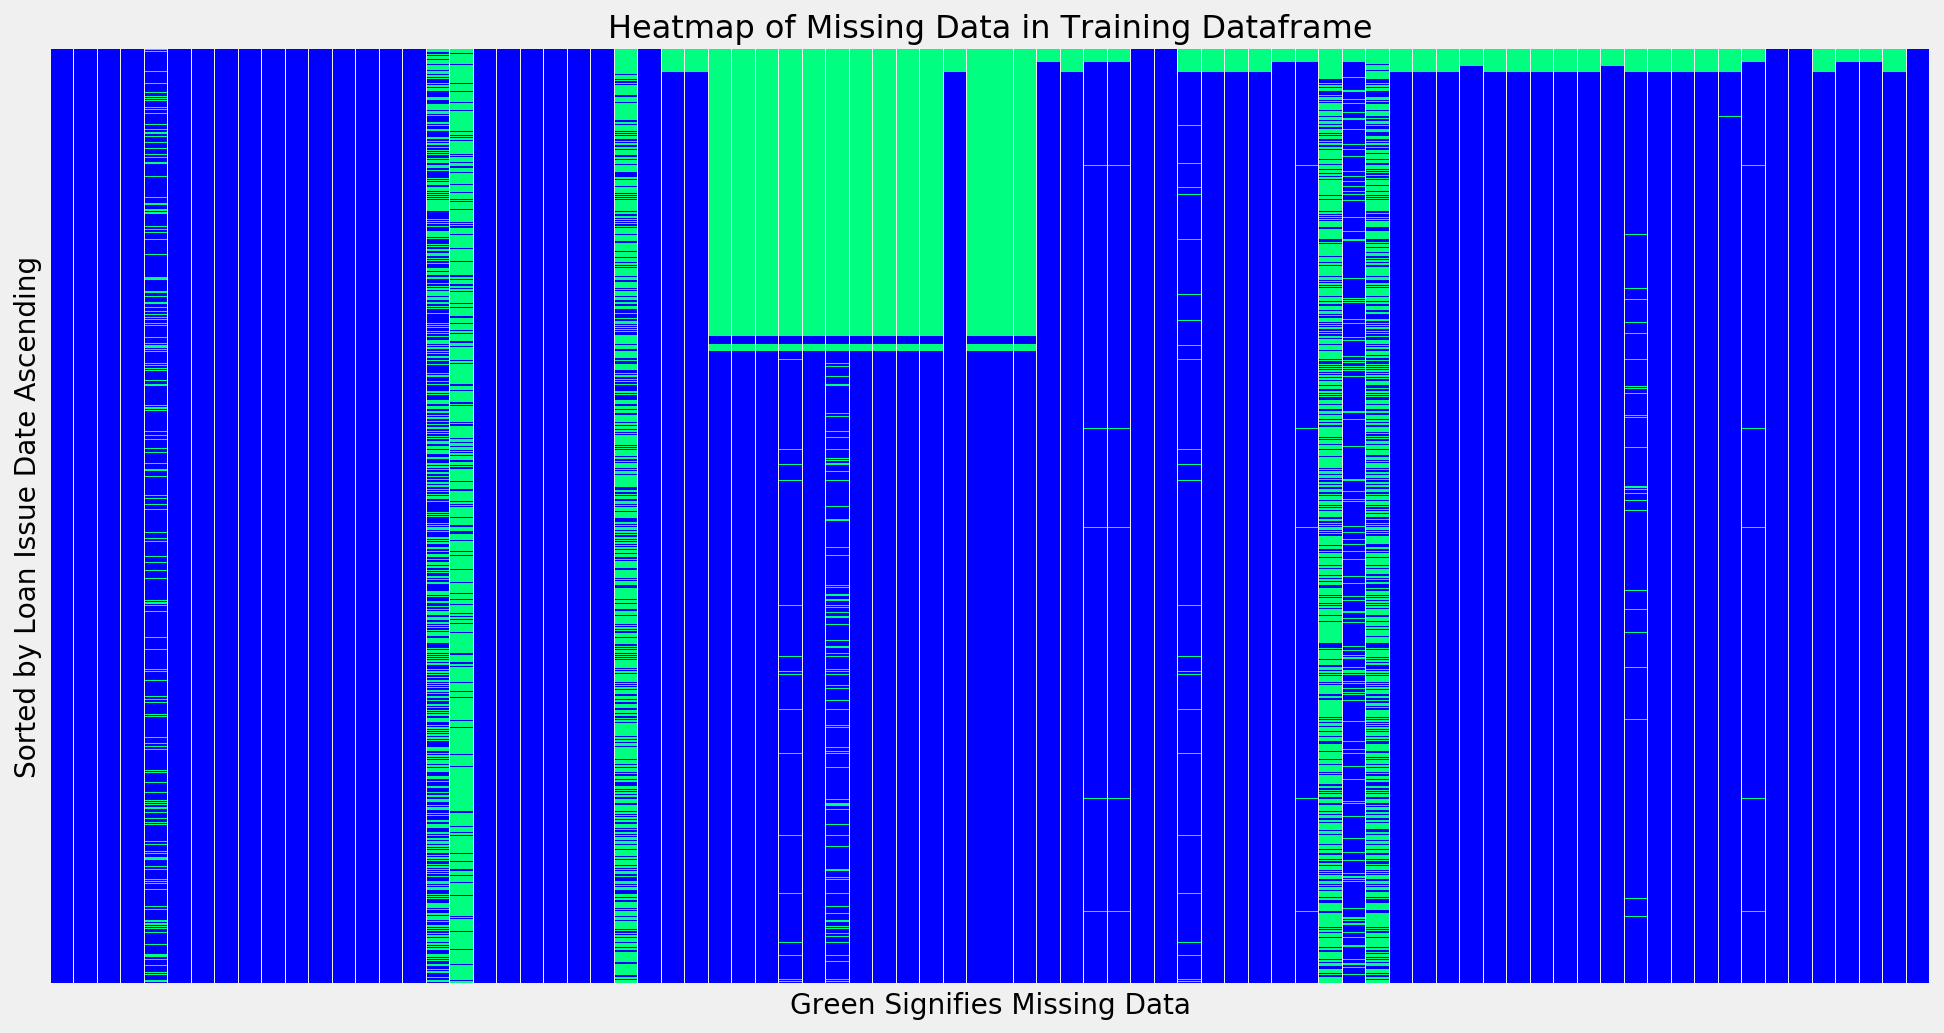

In [18]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(df.isnull(), yticklabels=False, xticklabels=False, cbar=False, cmap='winter')
ax.set_xlabel('Green Signifies Missing Data', fontsize=14)
ax.set_ylabel('Sorted by Loan Issue Date Ascending', fontsize=14)
ax.set_title('Heatmap of Missing Data in Training Dataframe', fontsize=16);

In [19]:
def get_percent_missing(series):
    num_missing = series.isnull()
    total = len(series)
    return 100*(num_missing/total)

df_missing = pd.DataFrame(round(df.isnull().sum()/len(df) * 100,2))
df_missing = df_missing.rename(columns={0: 'PctMissing'})
df_missing.sort_values(by='PctMissing', ascending=False, inplace=True)

dfmissing[df_missing['PctMissing'] > 0].head(20)

NameError: name 'dfmissing' is not defined